# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

## 1. **Data Validation & Cleaning**

In [1]:
#importing required libraries and setting color palette

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./product_sales.csv")

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


In [2]:
#checking shape and checking for missing values

print(df.shape)
print(df.isna().sum())

print(df.head())

(15000, 8)
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0           

In [3]:
#Removing missing values and making sure new dataframe is created.

df.dropna(inplace=True)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [4]:
df.shape

(13926, 8)

In [5]:
#checking values to confirm as described in Project Brief

print(df['week'].unique())
print(df['sales_method'].unique())
print(df['state'].unique())


[6 5 3 4 1 2]
['Email + Call' 'Call' 'Email' 'em + call' 'email']
['Kansas' 'Wisconsin' 'Illinois' 'Mississippi' 'Georgia' 'Oklahoma'
 'Massachusetts' 'Missouri' 'Texas' 'New York' 'Maryland' 'California'
 'Tennessee' 'North Dakota' 'Florida' 'Michigan' 'North Carolina'
 'Pennsylvania' 'Indiana' 'Hawaii' 'Colorado' 'Louisiana' 'Virginia'
 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire' 'Ohio' 'New Jersey'
 'Connecticut' 'Iowa' 'Montana' 'Washington' 'Arizona' 'Kentucky'
 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota' 'South Dakota' 'Maine'
 'Utah' 'West Virginia' 'Vermont' 'New Mexico' 'Rhode Island' 'Nevada'
 'Delaware' 'Idaho' 'Wyoming']


In [6]:
#code to fix the text errors in Sales_Method columns

df.loc[df.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df.sales_method == 'email',  'sales_method'] = 'Email'

In [7]:
# To confirm there are 3 unique values in the sales_method column.
print(df['sales_method'].unique())
df.info()


['Email + Call' 'Call' 'Email']
<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [8]:
#Checking the years as customer column to confirm all the years are under 40 years

df['years_as_customer'].value_counts().sort_index()

years_as_customer
0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: count, dtype: int64

In [9]:
#Outliers were found with 2 customers having year count as 47 and 63. so we must subset it to having years < 40

df = df[df["years_as_customer"]<40]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB


In [10]:
#validating State column

df['state'].nunique()
print("We have", df['state'].nunique(),"states in our dataset")

We have 50 states in our dataset


#### View and Shape of a Validated and Cleaned Dataset

In [11]:
df.shape

(13924, 8)

In [12]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


### Data Validation Summary

With an inital shape of 15000 rows and 8 columns, we ended with 13924 rows and 88 columns.

- week : Week had no more than 6 integer values of 1-6 as stated in Project Brief. Zero cleaning needed.
- sales_method : a column described as a character with three sales methods for customers. A total of 5 unique values were found. No missing values were found in column. 2 unique values were fixed to match project brief. Cleaning successful.
- customer_id : character data type with 15000 unique values for each customer. No cleaning needed.
- nb_sold : numeric data type to show number of new products sold. Zero missing values. No cleaning needed.
- revenue: numeric data type to show revenue from sales. 1074 missin values in this column. All missing value rows were dropped. Cleaning successful.
- years_as_customer : numeric data type that shows long customer has been buying from company. 2 outliers were found and dropped. Cleaning successful.
- nb_site_visits : numeric data type showing how many times customer visited website in the last 6 months. Zero missing values. No cleaning needed.
- state : character data type showing location of customer where orders are shipped. 50 unique values representing 50 states. Zero missing values. No cleaning needed.

#### Data Validation Complete

## 2. **Exploratory Analysis**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Reds")
sns.set_style("darkgrid")

### 1. How many customers were there for each approach ?

In [14]:
## Direct answer checking how many customers were contacted in each approach

df["sales_method"].value_counts()

sales_method
Email           6921
Call            4780
Email + Call    2223
Name: count, dtype: int64

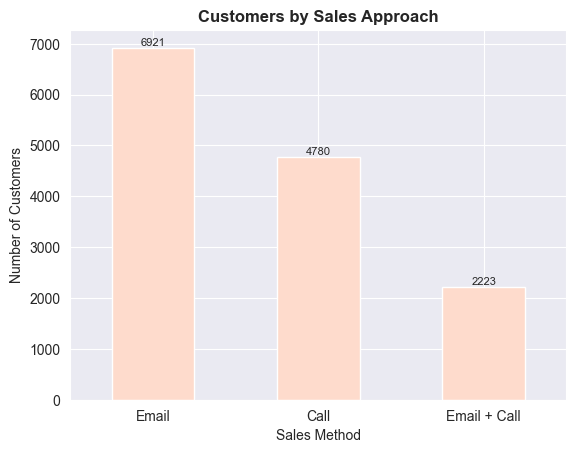

In [15]:
#Plot to show value count of customers by Sales Approach

g = df["sales_method"].value_counts().plot(kind="bar")
plt.xticks(rotation = 0)
g.set_title("Customers by Sales Approach", weight = "bold")
g.set_xlabel("Sales Method")
g.set_ylabel("Number of Customers")
for i in g.containers:
    g.bar_label(i, fontsize=8)


plt.show()

The number of customers for each approach can be seen through the barplot. We have 6921 sales made by email approach. 4780 sales made by Call. Another 2223 made by the combination of the email and call approach. The graph also shows the specific numbers of each sales approach using the bar_label method.

### 2. What does the spread of the revenue look like overall? And for each method?

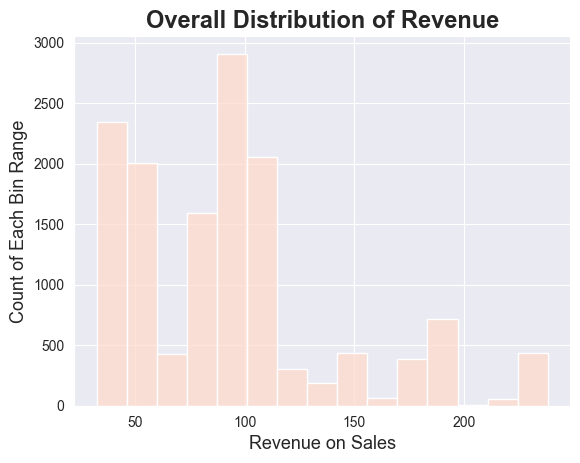

In [16]:
sns.histplot(x="revenue",data = df,bins=15)
plt.title("Overall Distribution of Revenue", size=17, weight='bold')
plt.xlabel("Revenue on Sales", size=13)
plt.ylabel("Count of Each Bin Range", size=13)

plt.show()

Our histogram plot shows there's a major revenue accumulation in the $40 - $90 range. Our mode was in the $80 - $110 range.

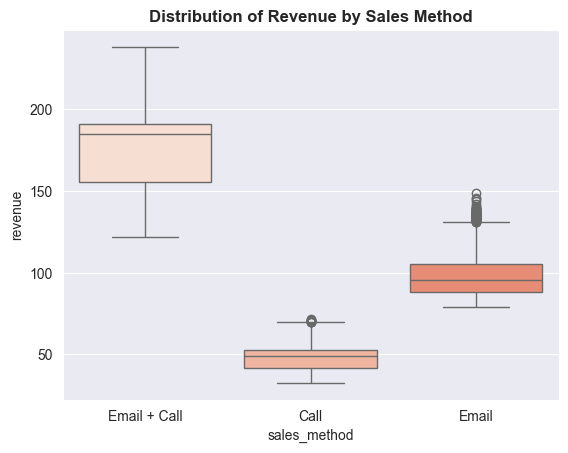

In [17]:
#Boxplot to show even more analysis of Revenue breakdown

sns.boxplot(y="revenue", x="sales_method", data=df, hue="sales_method")
plt.title("Distribution of Revenue by Sales Method", weight = "bold")
plt.show()

We can deduce that the "Email + Call" sale method has the highest set of revenue income. The "Call" method has the lowest.

We can also see a few outlier records in the singular "Email" and "Call" approach.

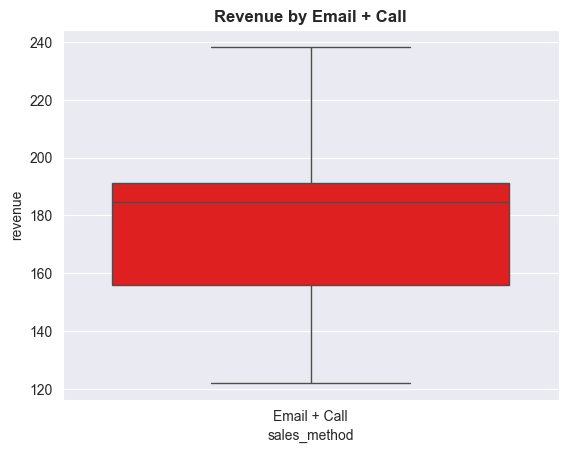

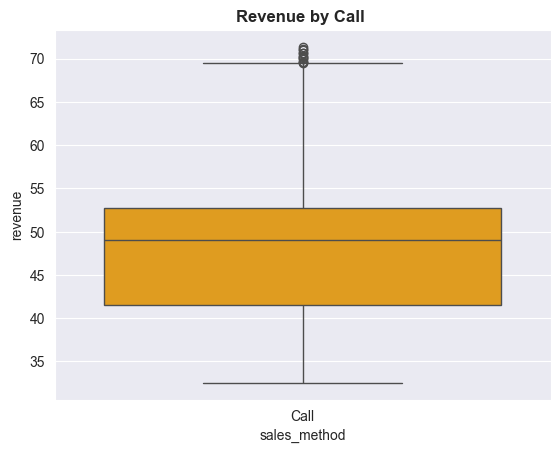

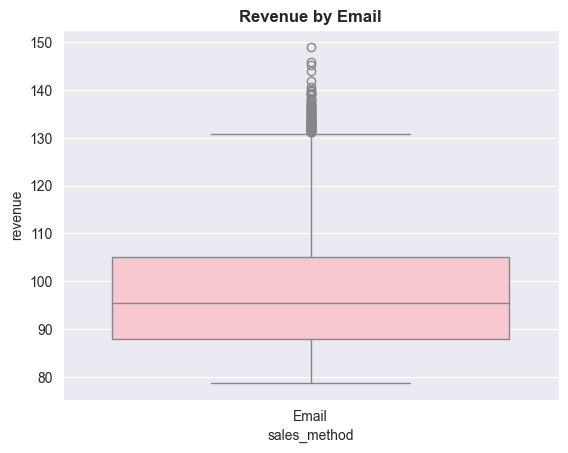

In [18]:

sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Email + Call'],color="red")
plt.title("Revenue by Email + Call", weight = "bold")
plt.show()
sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Call'], color = "orange")
plt.title("Revenue by Call ", weight = "bold")
plt.show()
sns.boxplot(x='sales_method', y='revenue', data=df[df['sales_method'] == 'Email'], color = "pink")
plt.title("Revenue by Email", weight = "bold")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16892\2698843567.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = (k[i]/k.sum()*100)
C:\Users\USER\AppData\Local\Temp\ipykernel_16892\2698843567.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = k.index[i], y = k[i], s = "{:.2f}%".format(a))


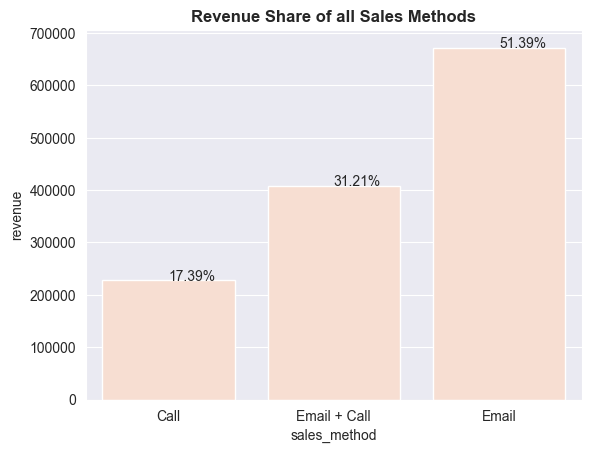

In [19]:
#method to see the percentage of revenue by sales method

k = df.groupby("sales_method")["revenue"].sum().sort_values()
sns.barplot( x = k.index, y = k)
plt.title("Revenue Share of all Sales Methods",weight="bold")
sns.set_style("darkgrid")
sns.set_palette("RdBu")
for i in range(0,3):
    a = (k[i]/k.sum()*100)
    plt.text(x = k.index[i], y = k[i], s = "{:.2f}%".format(a))
plt.show()

The "Email" approach brought in 51.39% of the total revenue over the six-week period, with "Email + Call" method bringing in 31.21%. The "Call" method had the lowest return brining just 17.39% of total revenue.

### 3. Was there any difference in revenue over time for each of the methods?

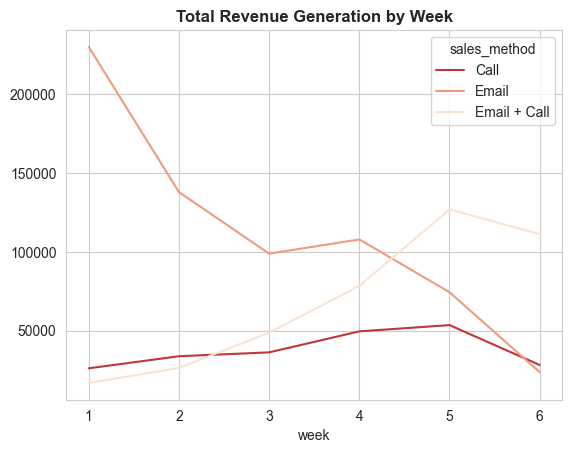

In [35]:
#Method to deduce revenue change over time (week)

weekRev = df.groupby(["week", "sales_method"])["revenue"].sum()
weekRev.unstack().plot()
plt.title("Total Revenue Generation by Week", weight = "bold")

plt.show()

This chart shows the "Email" method as an early revenue generator in the early weeks of sales with the "Call" and "Email + Call" method picking up gradually as the weeks go by. The "Email" method declined at a steady rate as the weeks went by. The reason that this happened can be found through a survey with the customers and that data has not been made available to us.

At the end of the 6th week, the "Email + Call" method was the current-highest total revenue generating sales method.

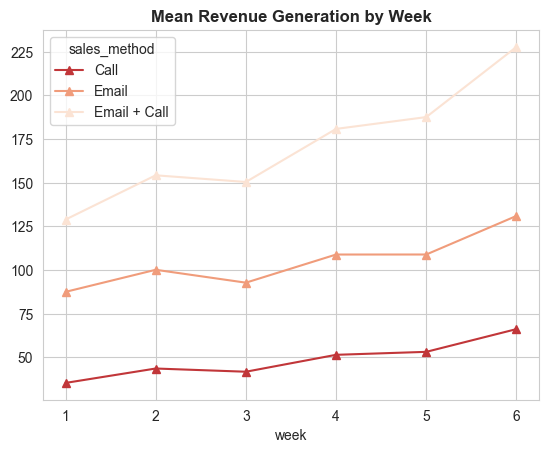

In [36]:
weekRevmean= df.groupby(["week", "sales_method"])["revenue"].mean()
weekRevmean.unstack().plot(marker = "^")
plt.title("Mean Revenue Generation by Week", weight = "bold")
sns.set_style("whitegrid")
plt.show()

This chart shows the "Email + Call" method as a high average revenue generator per week. The "Call" method improved at a steady rate as the weeks went by but could never generate an average of $75 per customer at any point. The "Email + Call" method brought in an average of >$225 in the 6th week. The "Email" method highest customer had a mean revenue of >$125 but <$137. This line plot shows these with the use of markers at the average point.

At the end of the 6th week, the "Email + Call" method had the highest mean revenue-generating sales method.

C:\Users\USER\AppData\Local\Temp\ipykernel_16892\2039113142.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g = a[i]
C:\Users\USER\AppData\Local\Temp\ipykernel_16892\2039113142.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = a.index[i], y = a[i],s= "{:.2f}".format(g))


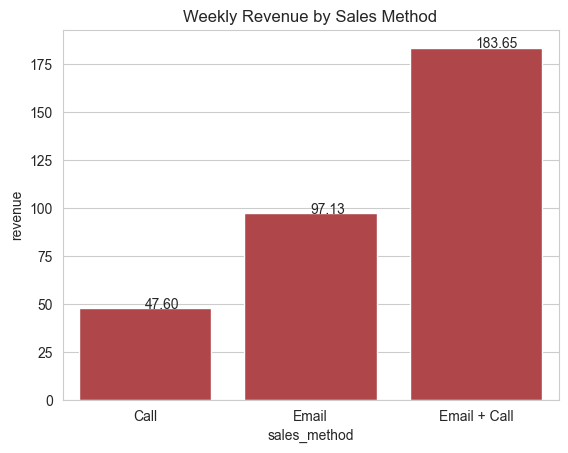

In [22]:
#Weekly Revenue for Sales Methods
a = df.groupby('sales_method')['revenue'].mean()
sns.barplot( x = a.index, y = a)
sns.set_style("whitegrid")
for i in range(0,3):
    g = a[i]
    plt.text(x = a.index[i], y = a[i],s= "{:.2f}".format(g))
plt.title("Weekly Revenue by Sales Method")
plt.show()

According to the bar chart above, the "Email + Call" approach gives the best mean weekly revenue. The priority for customer approach should be the "Email + Call" approach with the "Email" approach taking next priority. The stand-alone "Call" procedure should be phased out gradually.

## 3. **Business Metric to be Monitored**

The business can monitor what they want to achieve by the use of a Pivot Table. A pivot table that holds the mean and median of sales by sales method should be monitored continuously.

The inital value for the metric based on current data can be seen in the Pivot Table below:

In [37]:
#Pivot Table showing Mean & Median of sales methods
df.pivot_table(values = "revenue", columns = ["sales_method"],index = ["week"],aggfunc = ["mean", "median"]).style.background_gradient(cmap = "Greys")

The company should focus on these metrics if they are dedicated to increasing revenue and the values in this pivot table should be marked as their initial values. These metrics are measured over time and it can be reviewed weekly so as to make sure they are on the right path with their sales methods and customer approach.

Estimated Initial Values for the metric based on current data can be seen in above table also.

## 4. **Final Summary + Recommendations**

My recommendation would be to move away from the lone Call approach as it seems to be producing the worst results of all the sales methods. It is also very time-consuming when compared to using the "Email + Call" approach. The Call approach takes apporximately 30 minutes per customer while the Call part of the "Email + Call" approach takes approximately 10 minutes per customer.

The Email approach could also be re-defined with an improved analysis into why people responded to that approach. That way, we can be able to know what demography of people responded to the Email approach and make it more targeted.

There should also be follow-up emails to the Email approach and Email + Call approach. This way, people who have opened the first email are able to see the second email and finally act on what they plan to do.

The data collection methods can also be improved because there were 1074 missing values in our dataset which could be major to our final analysis.

I believe with these analysis and recommendations implemented, we can be sure we are using the best techniques to sell the new product effectively.
